# (Quick) Python introduction and POA calculation

<table>
  <tr>
    <td><img src="https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/notebooks/logos/CSTB_logo.jpg" width="200" />
    <td><img src="https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/notebooks/logos/Heliocity_logo.png" width="200" /> 
    <td><img src="https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/notebooks/logos/USMB_logo_horizontal.png" width="200" />
  </tr>
</table>

<sub>Author: Alexandre MATHIEU, Phd Student, in collaboration Heliocity / CSTB / USMB (LOCIE). </sub>
<sub>Phd thesis: Methodology development to guarantee building photovoltaic systems' performance including failure modelling</sub>


This notebook introduces how to use python to explore data and calculate the Plane Of Array (POA) irradiance components.

It is broken down into two parts:

1. **Python introduction**: The student will follow the python introduction and is invited to execute the cells.
2. **POA calculation exercice**: The student is invited to calculate the POA components.

The attendees are very much welcome to modify and create/execute some new notebook cells to explore data and try out new methods.

The tutorial has been inspired from the PVSC-pvlib tutorial: https://pvsc-python-tutorials.github.io/PVSC48-Python-Tutorial

**Make sure to manually execute the cells (ctrl + enter) yourself one by one**

The students are expected to do the **exercices**.

## I. Python Introduction

Python is a programming language which enable to perform a large number of tasks from math operations through file explorations to data treatment.

This section intends to provide usefull commands when coding in Python.

### I.1 Hello world

Printing texts is necessary to show results or the progress of a script.

In [1]:
# This is a code cell, and I am writing a comment which is not going to be executed thanks to the "#" character
# "#" is very useful to comment and precise what the code does, feel free to use it !
print("Hello world") # I print "hello world"

Hello world


In [2]:
my_text = "Something" # Write something here. It must be surrounded with "", otherwise it is going to crash 
print(my_text)

Something


In [3]:
# Include a variable in pre-defined text
new_text = "Olala"
print(f"My pre-defined text and '{new_text}'")

My pre-defined text and 'Olala'


### I.2. Operations

Basic operations can be fastened in Python.

In [4]:
a = 1 # assign 1 to the variable "a"
print(a)

1


In [5]:
print(a + 2)
print(a / 2)
print(a * 2)

3
0.5
2


In [6]:
b = 2 # assign 2 to the variable "b"
print(a + b)
print(a / b)
print(a * b)

3
0.5
2


In [7]:
# As mentionned earlier, some open-source libraries (with its functions) as numpy have some useful functions we can use
import numpy as np # Import numpy and rename it "np"

# mathematical constants
print(np.pi)
print(np.e)

# trigonometric functions
angle = np.pi/4
print(np.sin(angle)) # 'np.sin()' expects radiants
print(np.cos(angle))
print(np.tan(angle))

3.141592653589793
2.718281828459045
0.7071067811865476
0.7071067811865476
0.9999999999999999


#### Exercice

Calculate the BHI if DNI = 1000 W/m2 and the elevation angle z=60°

In [8]:
dni = 1000 # W / m2
bhi = 1000 * np.cos((90-60)*np.pi/180)  # W / m2
bhi_rounded = round(bhi,1) # Round the decimals
print(f"BHI: {bhi_rounded} W/m²")

BHI: 866.0 W/m²


### I.3 List, Series and DataFrame

One way to arrange data is to use list, pandas Series or DataFrame

In [9]:
my_list = [1 , 2 ,3]
print(my_list)

[1, 2, 3]


In [10]:
import pandas as pd # Import the package pandas and rename it "pd."

serie = pd.Series([1, 2,3]) # Create a serie
serie2 = pd.Series([4, 5,6]) # Create a serie

print("My first serie")
print(serie)
print("\n My second serie")
print(serie2)

My first serie
0    1
1    2
2    3
dtype: int64

 My second serie
0    4
1    5
2    6
dtype: int64


In [11]:
# A serie is more stuctured than a list and enables to make the calculations explicitly easier
print(serie + serie2)

0    5
1    7
2    9
dtype: int64


In [12]:
print(serie / serie2)

0    0.25
1    0.40
2    0.50
dtype: float64


In [13]:
print(serie * serie2)

0     4
1    10
2    18
dtype: int64


In [14]:
# You can still apply np operations on pd.Series ! 
np.cos(serie)

0    0.540302
1   -0.416147
2   -0.989992
dtype: float64

In [15]:
# A serie is defined by its index and its value can be extracted according to the loc command
print(serie.loc[0])

1


In [16]:
# When creating the Serie, we can associate an index when initiating the variable or we can also do it after
serie = pd.Series([1, 2,3], index=["first_index", "second_index", "third_index"]) # Create a serie
serie2.index = ["first_index", "second_index", "third_index"]

print("My first serie")
print(serie)
print("My second serie")
print(serie2)

print("\n My serie2 selection")
serie2.loc["second_index"]

My first serie
first_index     1
second_index    2
third_index     3
dtype: int64
My second serie
first_index     4
second_index    5
third_index     6
dtype: int64

 My serie2 selection


5

In [17]:
# Pandas Series/DataFrame are particularly used with timeseries with the index being dates or times
# For instance
index= pd.date_range("20231101", freq="H", periods=3) # H for "hour", D can also be used for "day"
serie_ts = pd.Series([1,2,3], index=index)
print(serie_ts)

2023-11-01 00:00:00    1
2023-11-01 01:00:00    2
2023-11-01 02:00:00    3
Freq: H, dtype: int64


<AxesSubplot:>

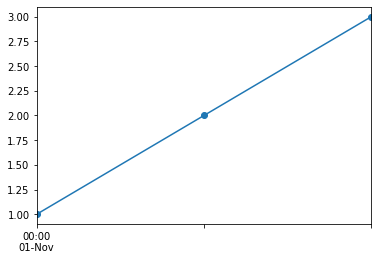

In [18]:
# And we can plot it (which is quite useful to explore data)
serie_ts.plot(marker="o")

In [19]:
# We can also use a DataFrame to store several series in different columns (if they have the same index)
data_df = pd.DataFrame() # Create an empty dataframe to store the series
data_df["first_column"] = serie
data_df["second_column"] = serie2
print(data_df)

              first_column  second_column
first_index              1              4
second_index             2              5
third_index              3              6


In [20]:
# The same operations like np.cos(), np.sin() etc... can be done on pd.Series
print(np.sin(data_df["second_column"]))

first_index    -0.756802
second_index   -0.958924
third_index    -0.279415
Name: second_column, dtype: float64


<AxesSubplot:>

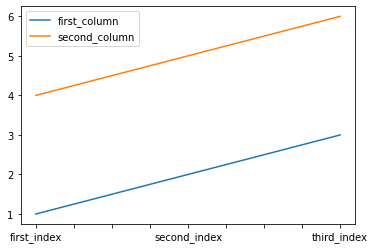

In [21]:
# And plot it !
data_df.plot() 

#### Exercice

Create a dataframe:

- With an DAILY datetime index starting from 2023-11-05 until 2023-11-08, included.
- Two columns, with one that is the double of the first one

and plot it.

<AxesSubplot:>

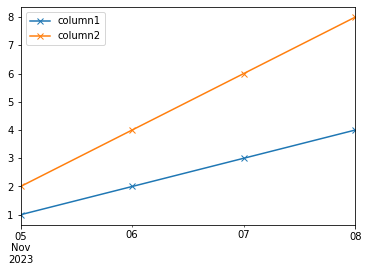

In [22]:
import pandas as pd

# Create the daily index with the "freq" argument, start from the 5th of November 2023 to the 8th, included
index = pd.date_range("2023-11-05", "2023-11-08", freq="D")

# Create a first timeserie with some values [1,2,3,4]
serie_ts= pd.Series([1, 2, 3, 4], index=index)

# Create another timeserie based on the first one
serie_ts2 = serie_ts * 2

# Create the dataframe object
df = pd.DataFrame()

# Fill the dataframe object with the pre-built timeseries
df["column1"] = serie_ts 
df["column2"] = serie_ts2

# Plot the result with "x" markers !
df.plot(marker="x")

## II.  Exercices: POA calculation

Let's use Python to compute POA components in a fast and (always) accurate way.

### II.1 Calculate POA for one timestep

- Under the isotropic/no-shading assumption
- With the following values

In [23]:
# Installation orientation
beta = 20 # tilt [°]
azimuth = 180 # azimuth [°]

# albedo
rho = 0.2

# Irradiance values
DNI = 677.6 # W/m2
GHI = 288.9 # W/m2 
DHI = 67.9 # W/m2

# Solar position
s_z = 72.0 # elevation [°]
s_azimuth = 173.9 # azimuth [°]

In [24]:
# The explicit way !

# Calculate the cos(AOI) first
cos_aoi = np.cos(beta* np.pi/180)*np.sin(s_z*np.pi/180) +np.sin(beta*np.pi/180)*np.cos(s_z*np.pi/180)*np.cos((azimuth-s_azimuth)*np.pi/180)

POAb = DNI * cos_aoi # Beam component

POAd = DHI * (1 + np.cos(beta* np.pi/180))/2 # Diffuse component

POAgrd = GHI  * rho* (1 - np.cos(beta* np.pi/180))/2 # Ground-reflected component
 
POA = POAb + POAd + POAgrd # Global component

print(f"POAb = {round(POAb,2)} W/m²")
print(f"POAd = {round(POAd,2)} W/m²")
print(f"POAgrd = {round(POAgrd,2)} W/m²")
print(f"POA global = {round(POA,2)} W/m²")

POAb = 676.78 W/m²
POAd = 65.85 W/m²
POAgrd = 1.74 W/m²
POA global = 744.38 W/m²


In [25]:
# The lazy way with the function "get_total_irradiance" from pvlib package
from pvlib.irradiance import get_total_irradiance

# It needs the the solar zenith as inputs
s_zenith = 90 - s_z # Solar zenith

# Notice it takes degrees as inputs
results = get_total_irradiance(beta, azimuth, s_zenith, s_azimuth, DNI, GHI, DHI, albedo=rho) 

print(results)

print("\n") # Go back to the line

# "results" is a "Ordered" dictionnary and its ".items()" method can be browsed through according to a for loop
for k, value in results.items():
    print(f"{k}: {round(value, 1)} W/m²")

OrderedDict([('poa_global', 744.3765776974298), ('poa_direct', 676.7817330362531), ('poa_diffuse', 67.59484466117671), ('poa_sky_diffuse', 65.8525644756816), ('poa_ground_diffuse', 1.7422801854951055)])


poa_global: 744.4 W/m²
poa_direct: 676.8 W/m²
poa_diffuse: 67.6 W/m²
poa_sky_diffuse: 65.9 W/m²
poa_ground_diffuse: 1.7 W/m²


### II.2 Calculate POA for one year from satellite data

In [26]:
import pandas as pd

# Load satellite CAMs irradiance data from an online file
urlw="https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/data/sat_data.csv"
weather_data = pd.read_csv(urlw, index_col=0)
weather_data.index = pd.to_datetime(weather_data.index).tz_convert("Europe/Paris")  # Convert the index to a datetime index and assign it to local time

print(weather_data.dropna().head(20))  # Show the first 5 lines, (all in W/m2)

                                ghi      dhi       dni
2022-01-01 01:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 02:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 03:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 04:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 05:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 06:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 07:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01 08:00:00+01:00    0.6882   0.6074    1.1661
2022-01-01 09:00:00+01:00   59.1956  25.4935  337.4030
2022-01-01 10:00:00+01:00  150.5869  61.0075  471.0327
2022-01-01 11:00:00+01:00  248.1986  63.4317  677.5654
2022-01-01 12:00:00+01:00  281.0088  84.9074  633.1003
2022-01-01 13:00:00+01:00  288.8650  67.8544  723.7922
2022-01-01 14:00:00+01:00  225.3259  70.7458  596.6607
2022-01-01 15:00:00+01:00  147.1628  48.1738  544.8499
2022-01-01 16:00:00+01:00   39.9784  20.9257  214.4652
2022-01-01 17:00:00+01:00    0.0000   0.0000    0.0000
2022-01-01

In [27]:
# Load satellite position data calculated from NREL algorithm: I. Reda and A. Andreas, Solar position algorithm for solar radiation applications. Solar Energy, vol. 76, no. 5, pp. 577-589, 2004.
# Stored in an online file
urls= "https://raw.githubusercontent.com/AlexandreHugoMathieu/pvfault_detection_solar_academy/refs/heads/master/data/solarpos_data.csv"
solar_position = pd.read_csv(urls, index_col=0)
solar_position.index = pd.to_datetime(solar_position.index).tz_convert("Europe/Paris")  # Convert the index to a datetime index and assign it to local time

print(solar_position.dropna().head(5))  # Show the first 5 lines, (all in ° degree)

                               zenith     azimuth
2022-01-01 01:00:00+01:00  153.182717  317.064974
2022-01-01 02:00:00+01:00  153.182717   17.989233
2022-01-01 03:00:00+01:00  148.059897   44.354858
2022-01-01 04:00:00+01:00  140.071691   63.762450
2022-01-01 05:00:00+01:00  130.744429   78.384802


<AxesSubplot:>

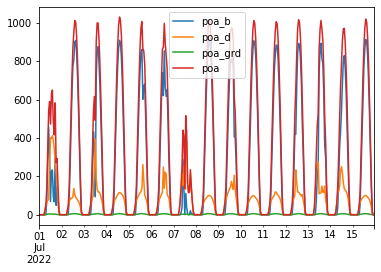

In [28]:
# The explicit way
s_z = 90- solar_position["zenith"] # elevation
s_azimuth = solar_position["azimuth"]

# Calculate the cos(AOI) first
cos_aoi = np.cos(beta* np.pi/180)*np.sin(s_z*np.pi/180) +np.sin(beta*np.pi/180)*np.cos(s_z*np.pi/180)*np.cos((azimuth-s_azimuth)*np.pi/180)

# Calculate all components and sum them up into "POAg"
POAb = (weather_data["dni"] * cos_aoi).clip(lower=0) ###
POAd =  weather_data["dhi"] * (1 + np.cos(beta* np.pi/180))/2
POAgrd =  weather_data["ghi"]  * rho* (1 - np.cos(beta* np.pi/180))/2
POAg = POAb + POAd + POAgrd

# Store the calculated components which are timeseries in a dataframe
data = pd.DataFrame()
data["poa_b"] = POAb
data["poa_d"] = POAd
data["poa_grd"] = POAgrd
data["poa"] = POAg

# Plot the data between the 01/07/2022 and 15/07/2022 with the ".loc" method
data.loc["20220701":"20220715"].plot()

<AxesSubplot:>

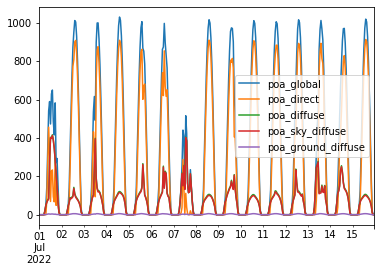

In [29]:
# The lazy way with the pvlib package
from pvlib.irradiance import get_total_irradiance

# Notice it takes degrees as inputs
data = get_total_irradiance(beta, azimuth, solar_position["zenith"], solar_position["azimuth"], weather_data["dni"], 
                            weather_data["ghi"], weather_data["dhi"], albedo=rho)

# Plot the data between the 01/07/2022 and 15/07/2022 with the ".loc" method
data.loc["20220701":"20220715"].plot()